In [1]:
!pip install tensorflow-gpu

In [2]:
!pip install mlxtend
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklern

ERROR: Could not find a version that satisfies the requirement sklern (from versions: none)
ERROR: No matching distribution found for sklern


In [3]:
!pip install scikit-learn

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
print(tf.__version__)

2.2.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
test_data_dir = 'data/test'
train_data_dir = 'data/train'

In [8]:
img_width = 32
img_height = 32
batch_size = 20

In [9]:
datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = datagen.flow_from_directory(directory = train_data_dir, 
                                              target_size = (img_width, img_height),
                                              classes = ['carton', 'metal', 'organico', 'papel', 'plastico', 'vidrio'],
                                              class_mode = 'sparse',
                                              batch_size = batch_size)

Found 2774 images belonging to 6 classes.


In [11]:
train_generator.classes

array([0, 0, 0, ..., 5, 5, 5])

In [12]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir,
                                                   target_size = (32, 32),
                                                   classes = ['carton', 'metal', 'organico', 'papel', 'plastico', 'vidrio'],
                                                   class_mode = 'sparse',
                                                   batch_size = batch_size)

Found 696 images belonging to 6 classes.


## Build the CNN Model

In [13]:
from tensorflow.keras.optimizers import SGD

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                 activation='relu', input_shape=[32,32,3]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

In [27]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size = (3,3), 
                 activation = 'relu',
                 padding = 'same',
                 kernel_initializer = 'he_uniform', 
                 input_shape = (img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size = (3,3), 
                 activation = 'relu',
                 padding = 'same',
                 kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size = (3,3), 
                 activation = 'relu',
                 padding = 'same',
                 kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', 
                kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [23]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [28]:
opt = SGD(learning_rate=0.005, momentum=0.9)

model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator),
                              epochs=20, 
                              validation_data=validation_generator,
                              validation_steps=len(validation_generator),
                              verbose=1)

Epoch 1/20
139/139 [==============================] - 3s 23ms/step - loss: 1.3303 - accuracy: 0.5054 - val_loss: 1.5575 - val_accuracy: 0.3966
Epoch 2/20
139/139 [==============================] - 3s 22ms/step - loss: 0.9942 - accuracy: 0.6143 - val_loss: 1.1866 - val_accuracy: 0.5589
Epoch 3/20
139/139 [==============================] - 3s 22ms/step - loss: 0.8921 - accuracy: 0.6449 - val_loss: 0.9305 - val_accuracy: 0.6782
Epoch 4/20
139/139 [==============================] - 3s 22ms/step - loss: 0.8030 - accuracy: 0.7004 - val_loss: 0.9868 - val_accuracy: 0.6207
Epoch 5/20
139/139 [==============================] - 3s 22ms/step - loss: 0.7541 - accuracy: 0.7192 - val_loss: 0.8925 - val_accuracy: 0.6839
Epoch 6/20
139/139 [==============================] - 3s 22ms/step - loss: 0.7223 - accuracy: 0.7350 - val_loss: 0.8777 - val_accuracy: 0.6767
Epoch 7/20
139/139 [==============================] - 3s 23ms/step - loss: 0.6654 - accuracy: 0.7592 - val_loss: 1.0044 - val_accuracy: 0.6422

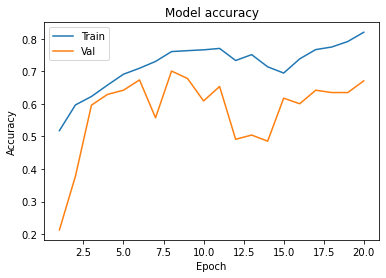

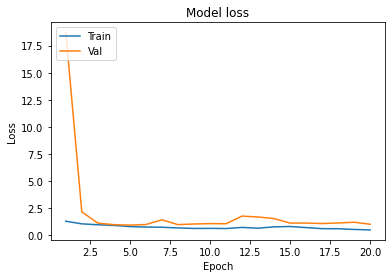

In [26]:
# Plot training and validation accuracy values
epoch_range = range(1,21)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Confusion Matrix

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix